<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Вывод:" data-toc-modified-id="Вывод:-2.0.1"><span class="toc-item-num">2.0.1&nbsp;&nbsp;</span>Вывод:</a></span></li></ul></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#Изучение-общей-информации-о-данных." data-toc-modified-id="Изучение-общей-информации-о-данных.-5.0.1"><span class="toc-item-num">5.0.1&nbsp;&nbsp;</span>Изучение общей информации о данных.</a></span></li><li><span><a href="#Предобработка-данных." data-toc-modified-id="Предобработка-данных.-5.0.2"><span class="toc-item-num">5.0.2&nbsp;&nbsp;</span>Предобработка данных.</a></span></li><li><span><a href="#Расчет-и-добавление-данных-в-таблицу." data-toc-modified-id="Расчет-и-добавление-данных-в-таблицу.-5.0.3"><span class="toc-item-num">5.0.3&nbsp;&nbsp;</span>Расчет и добавление данных в таблицу.</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-5.0.4"><span class="toc-item-num">5.0.4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5.0.5"><span class="toc-item-num">5.0.5&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></li></ul></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [49]:
import warnings
warnings.filterwarnings('ignore')

In [50]:
# импорт библиотек
import pandas as pd
import matplotlib.pyplot as plt  

In [51]:
# чтение файла с данными и сохранение в df
# изначально данные склеились в одну строку вместо того, чтобы разбиться по колонкам. 
# это произошло из-за разделителей в формате csv. Для разделения был использован параметр sep.
df = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')

In [52]:
# получение первых 10 строк таблицы df
df.head(10)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [53]:
# получение общей информации о данных в таблице df
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

### Вывод

Итак, в таблице 22 столбца. Типы данных в столбцах — float, int, bool и object.
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

**Выводы:**
1. По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма.
2. В названиях колонок нарушения стиля нет. 
3. В столбцах: ceiling_height(высота потолков), floors_total(всего этажей в доме), living_area(жилая площадь), is_apartment(аппартаменты), kitchen_area(площадь кухни), balcony(число балконов), locality_name(название населенного пункта), airports_nearest(расстояние до аэропорта), cityCenters_nearest(расстояние до центра города), parks_around3000(число парков в радиусе 3 км), parks_nearest(расстояние до ближайшего парка), ponds_around3000(число водоёмов в радиусе 3 км), ponds_nearest(расстояние до ближайшего водоёма), days_exposition(сколько дней было размещено объявление) - есть пропущенные значения.

## Предобработка данных

In [54]:
# подсчёт пропусков
display(df.isna().sum())

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Изучим столбцы, в которых пропущены значения и посмотртим, можем ли мы их заполнить. 
* ceiling_height(высота потолков) - 9195 пропусков,  лучше заполнить медианами с группировкой по населенным пунктам.  
* floors_total(всего этажей в доме) - 86 порпусков,  лучше заполнить медианами с группировкой по населенным пунктам.
* living_area(жилая площадь) - 1903 пропуска,  лучше заполнить медианами с группировкой по населенным пунктам.
* is_apartment(аппартаменты) - 20924 пропуска, логичнее всего заполнить пропуски значением False. 
* kitchen_area(площадь кухни) - 2278 пропусков,  лучше заполнить медианами с группировкой по населенным пунктам. 
* balcony(число балконов) - 11519 пропусков, скорее всего пропущены значения там, где балконов нет, можно заполнить нулями 0.  
* locality_name(название населенного пункта) - 49 пропусков, логичной замены нет, пропущенных значений меньше 1%, поэтому эти строки можно удалить.
* airports_nearest(расстояние до аэропорта) - 5542 пропуска,  лучше заполнить медианами с группировкой по населенным пунктам.  
* cityCenters_nearest(расстояние до центра города) - 5519 пропусков,  лучше заполнить медианами с группировкой по населенным пунктам. 
* parks_around3000(число парков в радиусе 3 км) - 5518 пропусков,  лучше заполнить медианами с группировкой по населенным пунктам.  
* parks_nearest(расстояние до ближайшего парка) - 15620 пропусков,  лучше заполнить медианами с группировкой по населенным пунктам.
* ponds_around3000(число водоёмов в радиусе 3 км) - 5518 пропусков, лучше заполнить медианами с группировкой по населенным пунктам.
* ponds_nearest(расстояние до ближайшего водоёма) - 14589 пропусков,  лучше заполнить медианами с группировкой по населенным пунктам. 
* days_exposition(сколько дней было размещено объявление) - 3181 пропусков, логичной замены нет, лучше пока оставить пустыми. 

In [55]:
df = df.dropna(subset=['locality_name']) #удаляем строки с пустыми значениями в столбце locality_name
df['is_apartment'] = df['is_apartment'].fillna(False) #заменяем пустые значения в столбце is_apartment значением False
df['balcony'] = df['balcony'].fillna(0) #заменяем пустые значения в столбце balcony значением 0.
display(df.isna().sum()) #проверяем результат. Теперь осталось заполнить остальные пропуски медаианными значениями. 

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9160
floors_total               85
living_area              1898
floor                       0
is_apartment                0
studio                      0
open_plan                   0
kitchen_area             2269
balcony                     0
locality_name               0
airports_nearest         5534
cityCenters_nearest      5511
parks_around3000         5510
parks_nearest           15586
ponds_around3000         5510
ponds_nearest           14565
days_exposition          3180
dtype: int64

In [56]:
#напишем функцию для заполнения пропусков медианой с группировкой по населенному пункту
def fill_nans(group_param, fill_param):
    for height in df[group_param].unique():
       median = df.loc[df[group_param] == height, fill_param].median()
       df.loc[(df[fill_param].isna()) & (df[group_param] == height), fill_param] = median
        
#некоторые значения не могут быть заполнены медианой по местоположению, поскольку о них нет данных, 
#такие пропуски заполним медианным значением по всему столбцу целиком        
       df.loc[df['ceiling_height'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['living_area'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['kitchen_area'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['airports_nearest'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['cityCenters_nearest'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['parks_around3000'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['parks_nearest'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['ponds_around3000'].isna(), fill_param] = df[fill_param].median()
       df.loc[df['ponds_nearest'].isna(), fill_param] = df[fill_param].median()
    
#вызываем функцию для каждого столбца с пустыми значениями 
fill_nans('locality_name', 'ceiling_height')
fill_nans('locality_name', 'floors_total')
fill_nans('locality_name', 'living_area')
fill_nans('locality_name', 'kitchen_area')
fill_nans('locality_name', 'airports_nearest')
fill_nans('locality_name', 'cityCenters_nearest')
fill_nans('locality_name', 'parks_around3000')
fill_nans('locality_name', 'parks_nearest')
fill_nans('locality_name', 'ponds_around3000')
fill_nans('locality_name', 'ponds_nearest')         
display(df.isna().sum()) #проверка результата 

total_images               0
last_price                 0
total_area                 0
first_day_exposition       0
rooms                      0
ceiling_height             0
floors_total               0
living_area                0
floor                      0
is_apartment               0
studio                     0
open_plan                  0
kitchen_area               0
balcony                    0
locality_name              0
airports_nearest           0
cityCenters_nearest        0
parks_around3000           0
parks_nearest              0
ponds_around3000           0
ponds_nearest              0
days_exposition         3180
dtype: int64

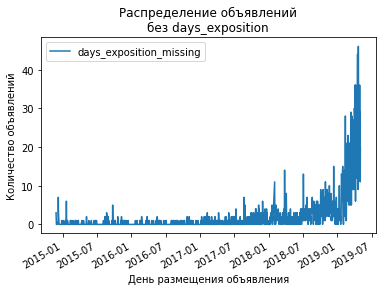

In [57]:
test = pd.read_csv('/datasets/real_estate_data.csv', sep = '\t')
test['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'])
test['days_exposition_missing'] = test['days_exposition'].isna().astype(int)
#суммируем и строим график
test.groupby('first_day_exposition').agg({'days_exposition_missing': 'sum'}).plot()
plt.xlabel('День размещения объявления'), plt.ylabel('Количество объявлений')
plt.title('Распределение объявлений\nбез days_exposition')
plt.show()

Число пропусков растет к концу наблюдаемого периода. Видимо пропуски означают незакрытые объявления. Будем считать, что дата выгрузки данных равна последнему дню наблюдений. Пропуски в этом столбце заполнять не будем. 

In [58]:
#заменим вещественный тип данных в столбцах: floors_total, balcony, parks_around3000, ponds_around3000 на целочисленный
df['floors_total'] = df['floors_total'].astype('int')
df['balcony'] = df['balcony'].astype('int')
df['parks_around3000'] = df['parks_around3000'].astype('int')
df['ponds_around3000'] = df['ponds_around3000'].astype('int')


In [59]:
df.info() #итоговая проверка всех изменений

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23650 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23650 non-null  int64  
 1   last_price            23650 non-null  float64
 2   total_area            23650 non-null  float64
 3   first_day_exposition  23650 non-null  object 
 4   rooms                 23650 non-null  int64  
 5   ceiling_height        23650 non-null  float64
 6   floors_total          23650 non-null  int64  
 7   living_area           23650 non-null  float64
 8   floor                 23650 non-null  int64  
 9   is_apartment          23650 non-null  bool   
 10  studio                23650 non-null  bool   
 11  open_plan             23650 non-null  bool   
 12  kitchen_area          23650 non-null  float64
 13  balcony               23650 non-null  int64  
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [60]:
df.duplicated().sum() #посчитаем явные дубликаты,их нет

0

#### Вывод: 
На этапе предобработки данных были выявлены и обработаны пропущенные значения, а именно:
- удалены строки с пустыми значениями в столбце locality_name
- заменены пустые значения в столбце is_apartment значением False
- заменены пустые значения в столбце balcony значением 0.
- остальные пропуски заполнены медаианными значениями. 
- проанализированы пропуски в столбце days_exposition, установлено, что дата выгрузки данных равна последнему дню наблюдений, поэтому пропуски в этом столбце было принято решение не заполнять.

Таким образом, данные готовы к дальнейшему анализу. 
    

## Расчёты и добавление результатов в таблицу

In [61]:
# добавляем в таблицу цену квадратного метра
df['price_square_meter'] = df['last_price'] / df['total_area']
# добавляем в таблицу соотношение жилой и общей площади
df['living_total'] = df['living_area'] / df['total_area']
# добавляем в таблицу соотношение отношение площади кухни к общей
df['kitchen_total'] = df['kitchen_area'] / df['total_area']

In [62]:
#добавляем в таблицу день недели, месяц и год публикации объявления
df['day'] = pd.DatetimeIndex(df['first_day_exposition']).weekday
df['month'] = pd.DatetimeIndex(df['first_day_exposition']).month
df['year'] = pd.DatetimeIndex(df['first_day_exposition']).year

In [63]:
#добавляем в таблицу этаж квартиры; варианты — первый, последний, другой
def floor_category(row):
    if row['floor'] == 1: return 'первый'
    if row['floor'] == row['floors_total']: return 'последний'
    return 'другой'
df['floor_category'] = df.apply(floor_category, axis = 1) 

df.head(10) #выведем 10 строк таблицы после всех преобразований и посмотрим результат

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,living_total,kitchen_total,day,month,year,floor_category
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16,51.0,8,False,...,2,755.0,NaN,120370.370370,0.472222,0.231481,3,3,2019,другой
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.70,9,31.0,1,False,...,1,503.0,81.0,82920.792079,0.767327,0.238119,1,12,2018,первый
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,2.70,5,34.3,4,False,...,2,574.0,558.0,92785.714286,0.612500,0.148214,3,8,2015,другой
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,2.70,9,31.0,9,False,...,3,234.0,424.0,408176.100629,0.194969,0.062264,4,7,2015,последний
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14,32.0,13,False,...,1,48.0,121.0,100000.000000,0.320000,0.410000,1,6,2018,другой
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,9,31.0,5,False,...,1,503.0,55.0,95065.789474,1.019737,0.316447,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.70,9,31.0,6,False,...,1,503.0,155.0,99195.710456,0.831099,0.257909,3,11,2017,другой
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,2.70,9,31.0,22,False,...,1,503.0,NaN,110544.692737,0.432961,0.134358,3,4,2019,другой
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,9,31.0,26,False,...,1,503.0,189.0,87454.764777,0.934861,0.290109,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.70,9,31.0,7,False,...,1,503.0,289.0,88524.590164,0.508197,0.157705,6,2,2017,другой


## Исследовательский анализ данных

Изучим следующие параметры: площадь, цена, число комнат, высота потолков. Построим гистограммы для каждого параметра.


***4.1 Гистограммы***

Построим гистограммы для каждогопарметра

<AxesSubplot:>

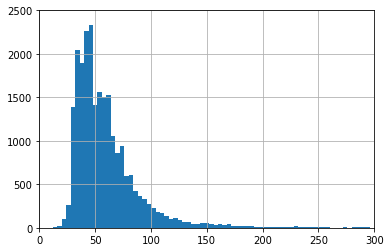

In [64]:
plt.ylim(0, 2500)
plt.xlim(0, 300) 
df['total_area'].hist(bins=100, range=(0, 400))

Вывод: В большинстве случаев площадь квартир равна 50кв.м. Прмежуток основной массы 25-100 кв.м. 
Есть выбросы около 300кв.м.

<AxesSubplot:>

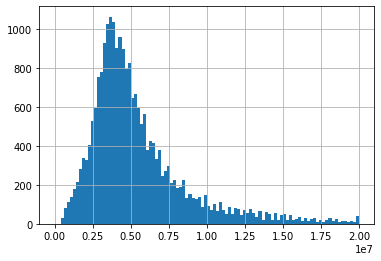

In [65]:
df['last_price'].hist(bins=100,range=(0, 20000000))

Вывод: По графику нельзя сделать определенных выводов. Все данные состредоточены около 0. 

<AxesSubplot:>

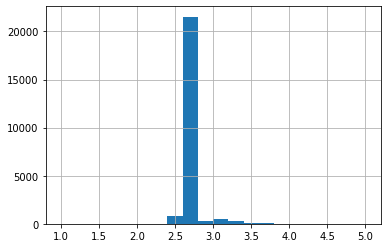

In [66]:
df['ceiling_height'].hist(bins=20, range=(1, 5))

Вывод: По графику нельзя сделать определенных выводов. Все данные состредоточены около 0.

<AxesSubplot:>

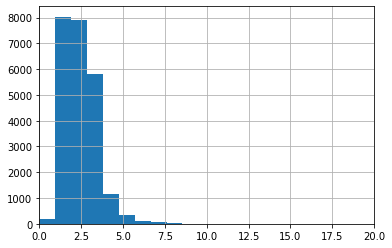

In [67]:
plt.xlim(0, 20)
df['rooms'].hist(bins=20)

Вывод: В основном преобладают квартиры с 1 или 2 комнатами. Самые редкие квартиры с количеством комнат больше 8. 

**4.2 Диаграммы размаха**

In [68]:
#сформирум сводные таблицы по изучаемым параметрам и цене за кв.м. 
df_total_area = df.pivot_table(index='price_square_meter', values='total_area') 
df_last_price = df.pivot_table(index='price_square_meter', values='last_price') 
df_ceiling_height = df.pivot_table(index='price_square_meter', values='ceiling_height') 
df_rooms = df.pivot_table(index='price_square_meter', values='rooms') 

<AxesSubplot:>

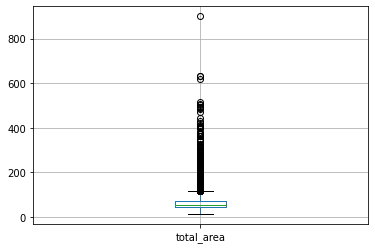

In [69]:

df_total_area.boxplot()

Вывод: Среднее значение площади 50 кв.м. 

<AxesSubplot:>

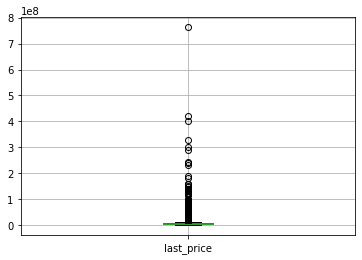

In [70]:

df_last_price.boxplot()


Вывод: В среднем разброс цен 1 - 2 млн. руб. Выброс - 8 млн. 

<AxesSubplot:>

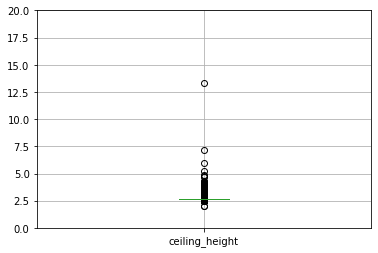

In [71]:
plt.ylim(0, 20)
df_ceiling_height.boxplot()

Вывод: Высота потолков в среднем 2,5 м. Выброс - 13 м.

<AxesSubplot:>

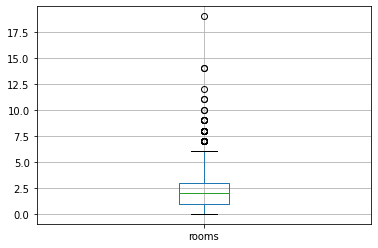

In [72]:
df_rooms.boxplot()

Вывод: в среднем представлены 2-комнатные квартиры. Аномальные значения - более 7 комнат. 

**4.3 Описание describe**

In [73]:
df_total_area.describe()

,total_area
count,14947.000000
mean,63.863744
std,37.919868
min,13.000000
25%,43.000000
50%,55.200000
75%,72.687500
max,900.000000


Вывод: средняя площадь 63 кв.м, Минимальная 13 кв.м. , стандартное отклонение 37, 9.
    

In [74]:
df_last_price.describe()

,last_price
count,1.494700e+04
mean,7.294717e+06
std,1.314933e+07
min,1.219000e+04
25%,3.570000e+06
50%,4.970000e+06
75%,7.400000e+06
max,7.630000e+08


Вывод: средняя цена 7 млн., миимальная 1,2 млн, стандартное отклонение 1,3 млн. 

In [75]:
df_ceiling_height.describe()

,ceiling_height
count,14947.000000
mean,2.729823
std,0.812770
min,2.000000
25%,2.700000
50%,2.700000
75%,2.700000
max,100.000000


Вывод: средняя высота 2,7 м., миимальная 2 м, стандартное отклонение 0,8.

In [76]:
df_rooms.describe()

,rooms
count,14947.000000
mean,2.157985
std,1.057358
min,0.000000
25%,1.000000
50%,2.000000
75%,3.000000
max,19.000000


Вывод: среднее кол-во комнат 2., миимальное значение 0, стандартное отклонение 1.

**4.4 Изучим время продажи квартиры.**

<AxesSubplot:>

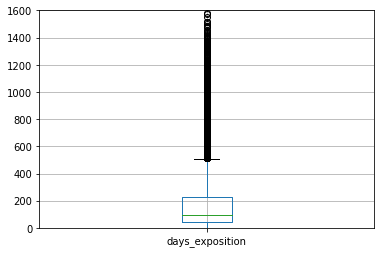

In [77]:
df['days_exposition'].plot(kind = 'box', ylim=(0, 1600),grid=True)

In [78]:
df['days_exposition'].describe()

count    20470.000000
mean       180.753200
std        219.777916
min          1.000000
25%         45.000000
50%         95.000000
75%        231.000000
max       1580.000000
Name: days_exposition, dtype: float64

- Среднее значение равно 180 дней
- Медиана равна 95 дней.
- Минимальное значение 1 день
- Максимальное значение 1580 дней.
- Аномальные значение - больше 500 дней. Это необычно долгиепродажи. (по графику это верхнее знаение усов) 
- Можно считать, что продажи прошли очень быстро, если прошли от 1 до 45 дней.


**4.5 Уберем редкие и выбивающиеся значения.**

In [79]:
#создаем новую таблицу с отфильтрованным данными.(убираем аномальные значения, которые выявили в предыдущих пунктах)
filtered_df = df.query('0 < rooms < 7 and 0 < total_area < 100 and 2 < ceiling_height < 3 and 1 < days_exposition < 500')

In [80]:
filtered_df

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,living_total,kitchen_total,day,month,year,floor_category
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,2.70,9,31.0,1,False,...,1,503.0,81.0,82920.792079,0.767327,0.238119,1,12,2018,первый
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,2.70,9,31.0,5,False,...,1,503.0,55.0,95065.789474,1.019737,0.316447,0,9,2018,другой
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,2.70,9,31.0,6,False,...,1,503.0,155.0,99195.710456,0.831099,0.257909,3,11,2017,другой
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,2.70,9,31.0,26,False,...,1,503.0,189.0,87454.764777,0.934861,0.290109,2,5,2018,другой
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.70,9,31.0,7,False,...,1,503.0,289.0,88524.590164,0.508197,0.157705,6,2,2017,другой
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28T00:00:00,1,2.86,15,16.3,4,False,...,2,652.0,29.0,100566.572238,0.461756,0.257790,2,2,2018,другой
23690,3,5500000.0,52.00,2018-07-19T00:00:00,2,2.70,9,31.0,2,False,...,1,503.0,15.0,105769.230769,0.596154,0.185000,3,7,2018,другой
23692,2,1350000.0,30.00,2017-07-07T00:00:00,1,2.70,9,31.0,4,False,...,1,503.0,413.0,45000.000000,1.033333,0.320667,4,7,2017,другой
23693,9,4600000.0,62.40,2016-08-05T00:00:00,3,2.60,9,40.0,8,False,...,1,675.0,239.0,73717.948718,0.641026,0.128205,4,8,2016,другой


In [81]:
filtered_df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,living_total,kitchen_total,day,month,year
count,16918.000000,1.691800e+04,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,...,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.000000,16918.00000,16918.000000
mean,9.598889,4.821145e+06,51.660147,1.873685,2.693707,9.150136,30.869910,6.070103,9.637027,0.604563,...,469.121941,1.153210,515.934035,123.511644,93046.903475,0.650590,0.204347,2.590200,6.58949,2017.373094
std,5.566124,2.539062e+06,16.648934,0.839170,0.039521,2.095275,4.603848,4.968143,1.571012,0.939832,...,159.246796,0.461619,162.633253,117.316767,32365.308603,0.201523,0.066126,1.792905,3.48935,0.841842
min,0.000000,4.300000e+05,12.000000,1.000000,2.300000,1.000000,8.000000,1.000000,2.000000,0.000000,...,3.000000,1.000000,13.000000,2.000000,7962.962963,0.208333,0.060606,0.000000,1.00000,2015.000000
25%,6.000000,3.300000e+06,38.500000,1.000000,2.700000,9.000000,31.000000,2.000000,9.620000,0.000000,...,460.000000,1.000000,503.000000,40.000000,75000.000000,0.500000,0.153920,1.000000,3.00000,2017.000000
50%,9.000000,4.300000e+06,48.000000,2.000000,2.700000,9.000000,31.000000,5.000000,9.620000,0.000000,...,460.000000,1.000000,503.000000,80.000000,92473.118280,0.620000,0.196327,3.000000,7.00000,2017.000000
75%,13.000000,5.750000e+06,62.000000,2.000000,2.700000,9.000000,31.000000,8.000000,9.620000,1.000000,...,460.000000,1.000000,503.000000,175.000000,108910.891089,0.775000,0.247787,4.000000,10.00000,2018.000000
max,50.000000,3.974400e+07,99.900000,6.000000,2.980000,60.000000,80.000000,31.000000,37.000000,5.000000,...,3190.000000,3.000000,1344.000000,499.000000,640422.350472,2.583333,0.825000,6.000000,12.00000,2019.000000


In [82]:
df.describe()

,total_images,last_price,total_area,rooms,ceiling_height,floors_total,living_area,floor,kitchen_area,balcony,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_square_meter,living_total,kitchen_total,day,month,year
count,23650.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000,...,23650.000000,23650.000000,23650.000000,20470.000000,2.365000e+04,23650.000000,23650.000000,23650.000000,23650.000000,23650.000000
mean,9.862326,6.541127e+06,60.329069,2.070106,2.724391,9.031416,32.919423,5.893277,10.057529,0.591712,...,469.685116,1.206216,508.785159,180.753200,9.943225e+04,0.623638,0.194489,2.568710,6.401564,2017.370021
std,5.682278,1.089640e+07,35.661808,1.078620,0.691937,2.278318,12.775238,4.883317,3.343987,0.959662,...,179.278998,0.538559,172.354346,219.777916,5.033794e+04,0.217299,0.073372,1.788808,3.491418,1.037806
min,0.000000,1.219000e+04,12.000000,0.000000,1.000000,1.000000,3.000000,1.000000,2.000000,0.000000,...,3.000000,1.000000,13.000000,1.000000,1.118349e+02,0.021583,0.010689,0.000000,1.000000,2014.000000
25%,6.000000,3.400000e+06,40.000000,1.000000,2.700000,9.000000,31.000000,2.000000,9.620000,0.000000,...,460.000000,1.000000,503.000000,45.000000,7.661497e+04,0.476923,0.140029,1.000000,3.000000,2017.000000
50%,9.000000,4.650000e+06,52.000000,2.000000,2.700000,9.000000,31.000000,4.000000,9.620000,0.000000,...,460.000000,1.000000,503.000000,95.000000,9.500000e+04,0.597849,0.185000,3.000000,6.000000,2017.000000
75%,14.000000,6.799000e+06,69.700000,3.000000,2.700000,9.000000,31.000000,8.000000,9.620000,1.000000,...,460.000000,1.000000,503.000000,231.000000,1.142742e+05,0.745192,0.240500,4.000000,10.000000,2018.000000
max,50.000000,7.630000e+08,900.000000,19.000000,100.000000,60.000000,332.000000,33.000000,107.000000,5.000000,...,3190.000000,3.000000,1344.000000,1580.000000,1.907500e+06,2.583333,0.825000,6.000000,12.000000,2019.000000


Сравним характеристики исходного и фильтрованного набора данных. 

Выводы:
1. Сохранилось 72% данных. Достаточно для анализа. 
2. Статистические характеристики (среднее, медиана) кардинально не изменились. 

Таким образом, измененный датасет существенно не изменился относительно изначального. Следовательно, его можно использовать в дальнейшем анализе. 

**4.6 Какие факторы больше всего влияют на стоимость квартиры? Изучим, зависит ли цена от площади, числа комнат, этажа (первого или последнего), удалённости от центра. Также изучим зависимость от даты размещения: дня недели, месяца и года.**

<AxesSubplot:xlabel='year'>

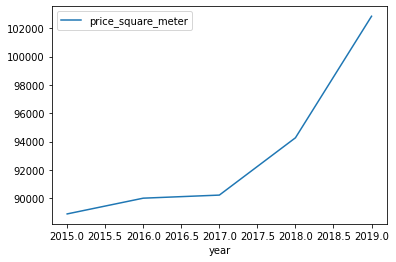

In [83]:
#график зависмости цены квадратного метра от года размещения объявления 
filtered_df.groupby('year').agg({'price_square_meter': 'median'}).plot()

Вывод: Начиная с 2015 года недвижимость цены на недвижимость растут. 

<AxesSubplot:xlabel='month'>

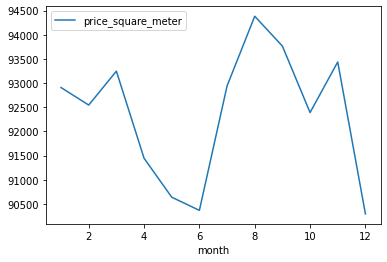

In [84]:
#график зависмости цены квадратного метра от месяца размещения объявления 
filtered_df.groupby('month').agg({'price_square_meter': 'median'}).plot()

Вывод: Пик высоких цен приходится на август. Самые низкие цены - в мае-июне и декабре. 

<AxesSubplot:xlabel='day'>

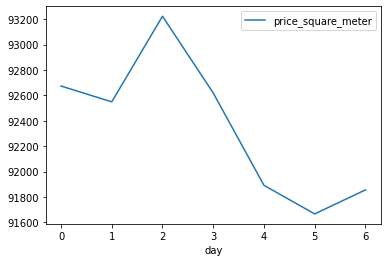

In [85]:
#график зависмости цены квадратного метра от дня размещения объявления 
filtered_df.groupby('day').agg({'price_square_meter': 'median'}).plot()

Вывод: Пик высоких цен приходится на объявления, опубликованные в среду, далее к концу недели цена за кв.м. снижается.

<AxesSubplot:xlabel='floor_category'>

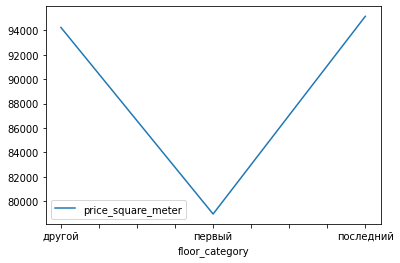

In [86]:
#график зависмости цены квадратного метра от этажа 
filtered_df.groupby('floor_category').agg({'price_square_meter': 'median'}).plot()

Вывод: Квартиры на первом этаже дешевле остальных вариантов. 

<AxesSubplot:xlabel='total_area'>

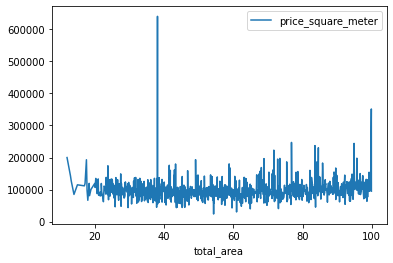

In [87]:
#график зависмости цены квадратного метра от общей площади 
filtered_df.groupby('total_area').agg({'price_square_meter': 'median'}).plot()

In [88]:
#посчитаем корреляцию Пирсона
filtered_df['total_area'].corr(filtered_df['price_square_meter']) 

0.02659166050667414

Вывод: Нет четкой зависимости между ценой и общей площадью. 

<AxesSubplot:xlabel='rooms'>

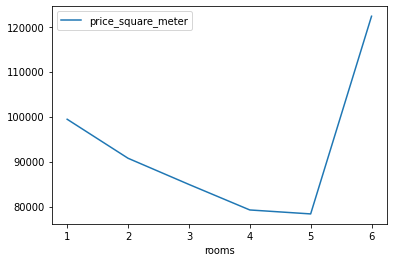

In [89]:
#график зависмости цены квадратного метра от количества комнат 
filtered_df.groupby('rooms').agg({'price_square_meter': 'median'}).plot()

In [90]:
#посчитаем корреляцию Пирсона
filtered_df['rooms'].corr(filtered_df['price_square_meter']) 

-0.16914981567917192

Вывод: По графику можно заметить, что однокомнатные квартиры дороже 2-5-комнатных. С 2 до 5 комнат идет спад цены за кв.м. Однако 6-комнатные квартиры резко растут в цене. 

<AxesSubplot:xlabel='cityCenters_nearest'>

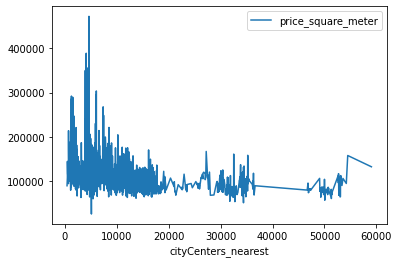

In [91]:
#график зависмости цены квадратного метра от удаленности от центра города
filtered_df.groupby('cityCenters_nearest').agg({'price_square_meter': 'median'}).plot()

In [92]:
#посчитаем корреляцию Пирсона
filtered_df['cityCenters_nearest'].corr(filtered_df['price_square_meter']) 

-0.11108839219476074

Вывод: Чем ближе к центру, тем дороже цена за кв.м. 

**4.5 Выберем 10 населённых пунктов с наибольшим числом объявлений. Посчитаем среднюю цену квадратного метра в этих населённых пунктах. Выделим населённые пункты с самой высокой и низкой стоимостью жилья.**

In [93]:
#с помощью сводной таблицы сгруппируем данные по столбцу с населенными пунктами
#посчитаем кол-во значений в каждой группе и среднее значение стоимости за кв.м.
#отсортируем полученные данные по убыванию 
df_locality_max = filtered_df.pivot_table(index='locality_name', values='price_square_meter', aggfunc=['count','mean'])
df_locality_max.columns = ['count_ad', 'price_square_meter']
df_locality_max = df_locality_max.sort_values(by=['count_ad'], ascending=False).head(10)
display(df_locality_max)

,count_ad,price_square_meter
locality_name,,
Санкт-Петербург,10830,106656.134380
посёлок Мурино,459,85323.055413
посёлок Шушары,374,77717.748491
Всеволожск,300,68551.433597
Колпино,281,74780.299061
посёлок Парголово,280,89661.576678
Пушкин,252,99846.850768
деревня Кудрово,249,92330.000459
Гатчина,239,68224.658418


Вывод: По таблице можно сделать вывод, что самое дорогое жилье в Санкт-Петербурге, на втором месте Пушкин, на третьем деревня Кудрово. Самое дешевое жилье в городе Выборг, Гатчина и Всеволожск. 

**4.6 Изучим предложения квартир: для каждой квартиры есть информация о расстоянии до центра. Выделим квартиры в Санкт-Петербурге и выясним, какая область входит в центр.** 


<AxesSubplot:xlabel='cityCenters_km'>

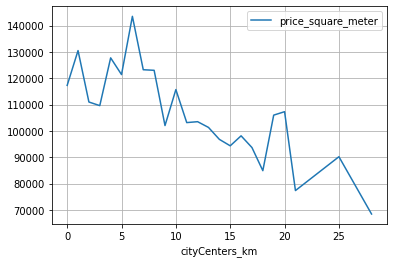

In [94]:
#Создадим столбец с расстоянием до центра в километрах: округлим до целых значений. 
#После этого посчитаем среднюю цену для каждого километра. 
#Построим график: он должен показывать, как цена зависит от удалённости от центра. 
#Определим границу, где график сильно меняется, — это и будет центральная зона.

filtered_df_spb = filtered_df.query('locality_name == "Санкт-Петербург"') #срез по Спб
filtered_df_spb[['cityCenters_km']] = (filtered_df_spb[['cityCenters_nearest']]/1000).astype(int) #новый столбец с расстоянием до центра в км
filtered_df_spb.pivot_table(index='cityCenters_km', values = 'price_square_meter', aggfunc = 'median').plot(grid=True)

Вывод: по графику можно заметить, что спад цены начинается на уровне 7 км. Таким образом, можно считать, что квартиры с расстоянием до центра до 7 км - находятся в центральной зоне. А, если расстояние до центра больше 7 км, то это за пределами центральной зоны.

**4.7 Выделим сегмент квартир в центре. Проанализируем эту территорию и изучим следующие параметры: площадь, цена, число комнат, высота потолков. Также выделим факторы, которые влияют на стоимость квартиры.*** 

In [95]:
filtered_df_spb_center = filtered_df_spb.query('cityCenters_km <= 7') #срез по центру Спб 
display(filtered_df_spb_center)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,price_square_meter,living_total,kitchen_total,day,month,year,floor_category,cityCenters_km
24,8,6500000.0,97.2,2015-10-31T00:00:00,2,2.70,3,46.50,1,False,...,124.0,265.0,66872.427984,0.478395,0.201646,5,10,2015,первый,2
137,11,13310800.0,85.1,2018-01-01T00:00:00,2,2.70,10,31.52,5,False,...,133.0,340.0,156413.631022,0.370388,0.315511,0,1,2018,другой,4
291,10,5900000.0,70.0,2017-01-24T00:00:00,3,2.51,5,47.40,1,False,...,118.0,480.0,84285.714286,0.677143,0.114286,1,1,2017,первый,4
318,12,9990000.0,67.0,2017-07-10T00:00:00,1,2.84,9,37.00,7,False,...,713.0,50.0,149104.477612,0.552239,0.253731,0,7,2017,другой,5
323,6,9591727.0,72.0,2017-06-29T00:00:00,2,2.80,10,34.00,9,False,...,534.0,118.0,133218.430556,0.472222,0.236111,3,6,2017,другой,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23625,12,6700000.0,42.0,2019-02-13T00:00:00,2,2.70,5,24.00,5,False,...,837.0,26.0,159523.809524,0.571429,0.145238,2,2,2019,последний,5
23632,20,5000000.0,38.0,2018-06-23T00:00:00,1,2.70,9,31.00,15,False,...,230.0,113.0,131578.947368,0.815789,0.260526,5,6,2018,другой,7
23644,7,4990000.0,62.5,2018-04-26T00:00:00,2,2.70,4,32.30,4,False,...,171.0,166.0,79840.000000,0.516800,0.193600,3,4,2018,последний,4
23665,11,4250000.0,47.0,2016-05-20T00:00:00,1,2.70,6,18.20,1,False,...,519.0,131.0,90425.531915,0.387234,0.310638,4,5,2016,первый,4


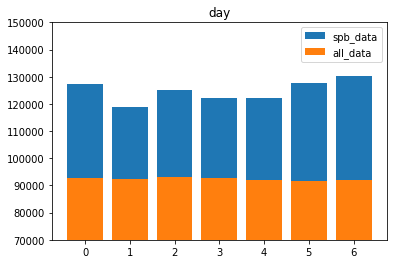

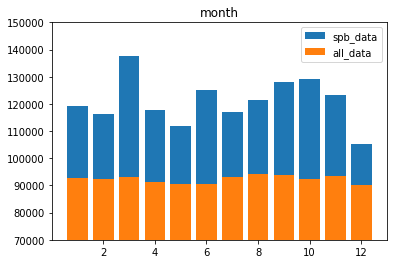

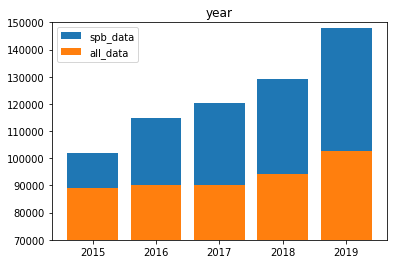

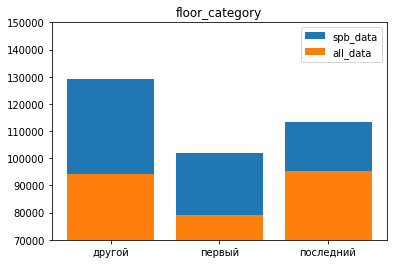

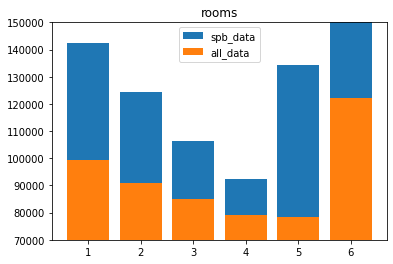

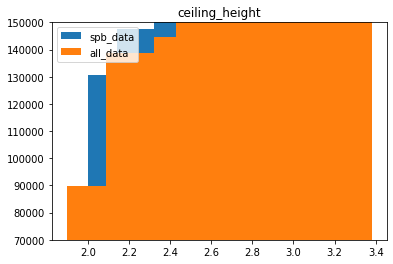

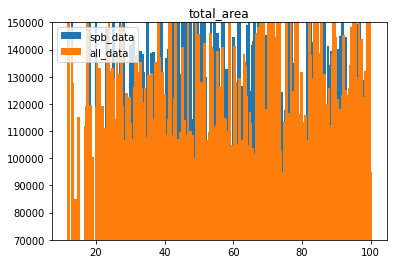

In [96]:
def plotter(column):
    all_df = filtered_df.pivot_table(index=column, values='price_square_meter', aggfunc='median')
    spb_df = filtered_df_spb_center.pivot_table(index=column, values='price_square_meter', aggfunc='median')
    plt.bar(spb_df.index, spb_df['price_square_meter'], label='spb_data')
    plt.bar(all_df.index, all_df['price_square_meter'], label='all_data')
    plt.title(column)
    plt.ylim([70000, 150000])
    plt.legend()
    plt.show()

plotter('day')
plotter('month') 
plotter('year')
plotter('floor_category')
plotter('rooms')
plotter('ceiling_height') 
plotter('total_area')

Вывод: По графикам можно сделать вывод, что зависимость цены за кв. м от изучаемых параметров у квартир в центре аналогична зависимости по всем данным. Однако, выборка квартир в центре примерно в 2-3 раза дороже. 

## Общий вывод

На вход поступили данные от сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге 
и соседних населённых пунктах за несколько лет. 

Целью проекта было научиться определять рыночную стоимость объектов недвижимости. 
Задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность.

Основное исследование прошло в 5 этапов:

#### Изучение общей информации о данных.
На данном этапе мы получили общую информации о данных в таблице и увидели, с чем предстоит иметь дело.

Основные проблемы, которые были выявлены: 
1. Большое количество пропущенных значений.
2. Не все типы данных подходили для анализа.

#### Предобработка данных.
На втором этапе мы решили проблемы, выявленные на первом этапе и подготовили данные ддля дальнейшего анализа.
А именно:
1. Заполненили пропуски.
2. Измененили типы данных на те, которые подойдут для дальнейшего анализа. 
3. Избавились от некорректных данных, которые не повлияют на дальнейший анализ.

#### Расчет и добавление данных в таблицу.
На данном третьем этапе мы рассчитали данные, которые нам понадобятся для анализа и добавили их в новые столбцы исходной таблицы.
1. цену квадратного метра;
2. день недели, месяц и год публикации объявления;
3. этаж квартиры; варианты — первый, последний, другой;
4. соотношение жилой и общей площади, а также отношение площади кухни к общей.

#### Исследовательский анализ данных 
На 4 этапе мы провели исследовательский анализ данных, а именно:
1. Изучили, как парметры - площадь, число комнат, высота потолков влияют на цену квадратного метра. 
2. Изучили время продажи квартиры. Выяснили, сколько обычно занимает продажа. 
3. Убрали редкие и выбивающиеся значения.
4. Выяснили какие факторы больше всего влияют на стоимость квартиры и зависит ли цена от площади, числа комнат, удалённости от центра. 
5. Изучили зависимость цены от того, на каком этаже расположена квартира: первом, последнем или другом. Также изучили зависимость от даты размещения: дня недели, месяца и года.
6. Выбрали 10 населённых пунктов с наибольшим числом объявлений и посчитали среднюю цену квадратного метра в этих населённых пунктах. Узнали населённые пункты с самой высокой и низкой стоимостью жилья. 
7. Выделили квартиры в центре Санкт-Петербурга и построили график, как цена зависит от удаленности от центра. 
8. Выделили сегмент квартир в центре. Проанализировали эту территорию и изучили следующие параметры: площадь, цена, число комнат, высота потолков. 


#### Общий вывод
Последний, пятый этап посвящен обобщению результатов исследования и рекомендаций заказчику на основе проведенного анализа. 
1. Чем выше потолки, тем дороже стоимость кв. м. 
2. Самые дорогие - однокомнатные и шести комнатные квартиры. На втором месте двухкомнатные и пятикомнатные. Цена за м.кв. у трехкомнатных и четырехкомнатных самая низкая. 
3. Квартиры на первом этаже дешевле остальных. 
4. С 2015 по 2019 год квартиры только дорожали. 
5. Пик высоких цен на недвижимость приходится на август. Самые низкие цены - в мае-июне и декабре.
6. Пик высоких цен приходится на объявления, опубликованные в среду, далее к концу недели цена за кв.м. снижается. 
7. Зависимости между общей площадтю и ценой за кв. м. выявлено не было. 
8. В среднем продажа квартиры занимает 95 дней. Можно считать, что продажи прошли очень быстро, если прошли от 1 до 45 дней.Аномально долгие продажи занимают больше 500 дней. 
9. Самое дорогое жилье в Санкт-Петербурге, на втором месте Пушкин, на третьем деревня Кудрово. Самое дешевое жилье в городе Выборг, Гатчина и Всеволожск. 
10. Квартиры с расстоянием до центра до 7 км - находятся в центральной зоне. А, если расстояние до центра больше 7 км, то это за пределами центральной зоны.
11. Зависимость цены за кв. м от изучаемых параметров у квартир в центре аналогична зависимости по всем данным. Однако, выборка квартир в центре примерно в 2-3 раза дороже.

